In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [33]:
#making the cmap
cmap=cm.RdBu_r
#cmap.set_under(’w’) #set background to white
#cmapseismic=cm.seismic
#cmapseismic.set_under(’w’) #set background to white


In [34]:
import healpy as hp

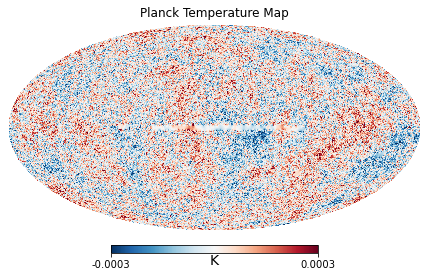

In [10]:
planck_IQU_SMICA=hp.read_map('/home/augusto/Descargas/COM_CMB_IQU-smica_2048_R3.00_hm2.fits')
fig=plt.figure(1)
hp.mollview(planck_IQU_SMICA, min=-0.0003,max=0.0003,
title='Planck Temperature Map',fig=1,unit='K',cmap=cmap)


In [35]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [36]:
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower

In [37]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()

pars.set_cosmology(H0=70, ombh2=0.019, omch2=0.122, mnu=0.06, omk=0.05, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [38]:
#calculate results for these parameters
results = camb.get_results(pars)

In [39]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')

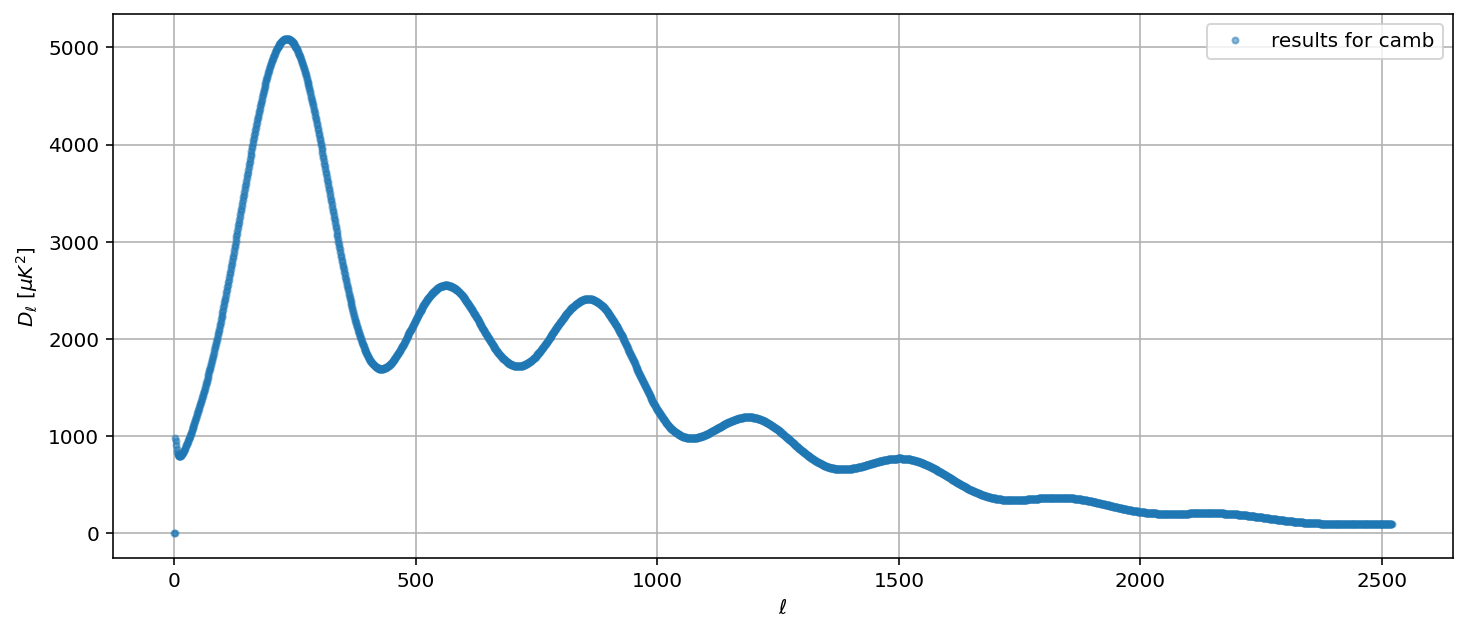

In [40]:
#plot the total lensed CMB power spectra 
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
ls = np.arange(totCL.shape[0])
plt.figure(figsize=(12, 5))

plt.plot(ls, unlensedCL[:,0], '.', alpha = 0.5, label ='results for camb')
plt.xlabel(r'$\ell$')
plt.ylabel(r"$D_\ell~[\mu K^2]$")
plt.legend()
plt.grid()
plt.savefig('example1.png')

In [69]:
nside=64
cl=unlensedCL[:,0]
mapa = hp.sphtfunc.synfast(cl,nside=nside, lmax=None)

In [67]:
mapa.shape

(49152,)

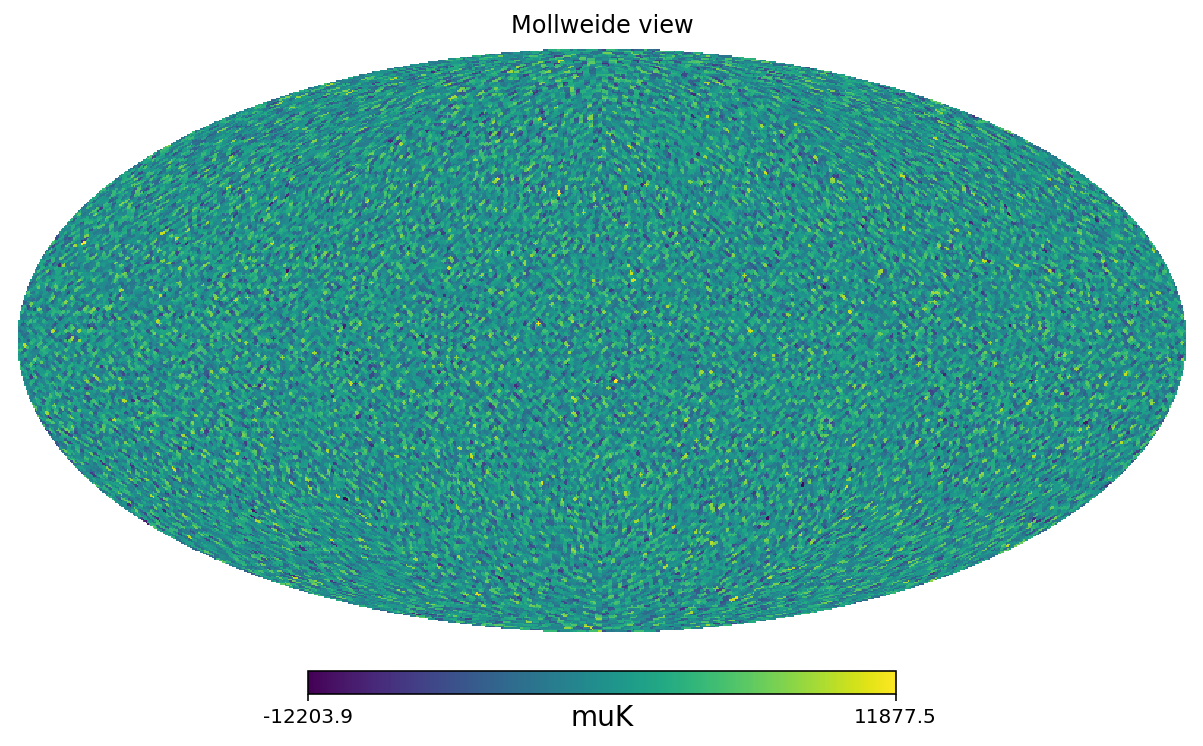

In [70]:
hp.mollview(mapa, unit= 'muK')

In [71]:
lmax=2500
cls=hp.anafast(mapa, lmax= lmax)
ell=np.arange(len(cls))


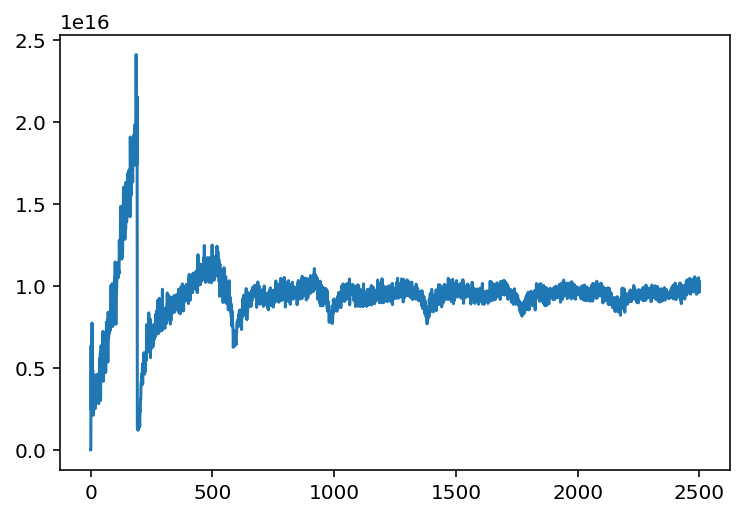

In [72]:
plt.plot(ell, cls)